In [ ]:
!pip install statsmodels --upgrade

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
#from statsmodels.tsa.statespace.sarimax.SARIMAX import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import os
import enum

/tmp/ipykernel_16887/3121731339.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
!wget -O ukdale_group.zip https://github.com/Vita98/MMSAProject/raw/main/Dataset/ukdale_group.zip
!unzip ./ukdale_group.zip
!mkdir result

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
class TrainignTimeType(enum.IntEnum):
	ONE_WEEK = 10080
	ONE_MONTH = 43200

class TestingTimeType(enum.IntEnum):
	ONE_DAY = 1440

In [7]:
'''
	PUT HERE THE CONFIGURATION VALUES
										'''
trainSize = TrainignTimeType.ONE_MONTH
testSize = TestingTimeType.ONE_DAY

originFileName = "ukdale_def4.csv"
seriesName = "Tv_Dvd_Lamp"


In [4]:
#Save the time series given as parameter 
def save_series_to_csv(series, fileName):
	path = "result/" + originFileName[:-4]

	if not os.path.isdir(path):
		try:
			os.mkdir(path)
		except OSError:
			print("Creation of the directory %s failed" % path)

	path = "result/" + originFileName[:-4] + "/" + seriesName

	if not os.path.isdir(path):
		try:
			os.mkdir(path)
		except OSError:
			print("Creation of the directory %s failed" % path)

	day = trainSize / 1440
	file = open(path + "/" + str(int(day)) + "days_" + fileName, "w")
	file.write(series.to_csv(header=False))
	file.close()


#Save the plot from pyplot
def save_plot():
	path = "result/" + originFileName[:-4]

	if not os.path.isdir(path):
		try:
			os.mkdir(path)
		except OSError:
			print("Creation of the directory %s failed" % path)

	path = "result/" + originFileName[:-4] + "/" + seriesName
	if not os.path.isdir(path):
		try:
			os.mkdir(path)
		except OSError:
			print("Creation of the directory %s failed" % path)

	day = trainSize / 1440
	finalPath = path + "/" + str(int(day)) + "days_plot.png"
	pyplot.savefig(finalPath, dpi=100)

#Parser for the read_csv
def parser(x):
	return datetime.strptime(x, '%y-%m-%d %H:%M:%S')

In [8]:
#main function
numbersOfRowToRead = int(trainSize) + int(testSize)

#Reading the series from the dataset file
series = read_csv("Dataset/" + originFileName,header=0,index_col=0,nrows=numbersOfRowToRead)
print(series[seriesName].head())

#Splitting the dataset into training and testing 
X = series[seriesName]
train, test = X[0:trainSize], X[trainSize:trainSize+testSize]
history = [x for x in train]
predictions = list()

#Creating the ARIMA model
#Creating the ARIMA model
#(5,2,1) start_params=[0,0,0,0,0,0,1,5]
#(5,1,1) start_params=[0,0,0,0,0,0,1,3]
print("\nTraining the model...\n")
#model = ARIMA(history, order=(5,0,1))
#model_fit = model.fit(start_params=[0,0,0,0,0,0,0,1])
maxLen = len(test)

my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 12)
# define model

model = sm.tsa.statespace.SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order)
#model = SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order)

model_fit = model.fit()

print("Testing...")
# walk-forward validation
"""
for t in range(len(test)):

    perc = (100 / maxLen) * t
    print("\rPerc: %.2f" %perc, end="")
    #print ("\033[A                             \033[A")

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

    model_fit = model_fit.append([test[t]])
    #print('predicted=%f, expected=%f' % (yhat, obs))

predictions = model_fit.predict(start=0, end=len(test))
#print(yhat)
#add time index to predictions
#fc_series = pd.Series(predictions,index=test.index)

# evaluate forecasts
#rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.figure(figsize=(12,5), dpi=100)
pyplot.plot(train, color='blue')
pyplot.plot(test, color='blue')
pyplot.plot(predictions, color='red')
day = trainSize / 1440
pyplot.title(seriesName + " " + str(int(day)) + " days trained")
ax = pyplot.gca()
ax.axes.xaxis.set_visible(False)
"""
#saving date
#save_series_to_csv(train, "train.csv")
#save_series_to_csv(test, "test.csv")
#save_series_to_csv(fc_series, "predictions.csv")
#save_plot()
#pyplot.show()

print("\nAll done!\n")

Time
2013-03-09 14:40:00    12.88
2013-03-09 14:41:00    12.90
2013-03-09 14:42:00    12.70
2013-03-09 14:43:00    12.50
2013-03-09 14:44:00    12.80
Name: Tv_Dvd_Lamp, dtype: float64

Training the model...



/home/ali/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
/home/ali/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


Testing...

All done!



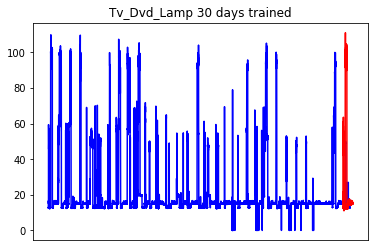

In [9]:
yhat = model_fit.predict(start=0, end=len(test))
#print(yhat)
predictions = list()

for value in yhat[1:]:
    predictions.append(value)

#print(predictions)

fc_series = pd.Series(predictions,index=test.index)
pyplot.plot(train, color='blue')
pyplot.plot(test, color='blue')
pyplot.plot(fc_series, color='red')
day = trainSize / 1440
pyplot.title(seriesName + " " + str(int(day)) + " days trained")
ax = pyplot.gca()
ax.axes.xaxis.set_visible(False)
